<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Wpbc-Data" data-toc-modified-id="Wpbc-Data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Wpbc Data</a></span></li></ul></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot Data</a></span></li><li><span><a href="#Plot-Kernels" data-toc-modified-id="Plot-Kernels-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Kernels</a></span></li></ul></li><li><span><a href="#BEMKL" data-toc-modified-id="BEMKL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BEMKL</a></span><ul class="toc-item"><li><span><a href="#Non-sparse" data-toc-modified-id="Non-sparse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Non-sparse</a></span></li><li><span><a href="#Kernel-Sparse" data-toc-modified-id="Kernel-Sparse-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Kernel-Sparse</a></span></li><li><span><a href="#data-sparse" data-toc-modified-id="data-sparse-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>data-sparse</a></span></li><li><span><a href="#data-and-kernel-sparse" data-toc-modified-id="data-and-kernel-sparse-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>data and kernel sparse</a></span></li><li><span><a href="#Sparsity-Plots" data-toc-modified-id="Sparsity-Plots-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Sparsity Plots</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Comparison-with-SVM" data-toc-modified-id="Comparison-with-SVM-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Comparison with SVM</a></span><ul class="toc-item"><li><span><a href="#Chosen-support-vectors-(non-sparse-combined-kernel)" data-toc-modified-id="Chosen-support-vectors-(non-sparse-combined-kernel)-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Chosen support vectors (non-sparse combined kernel)</a></span></li><li><span><a href="#Chosen-support-vectors-(data-sparse-combined-kernel)" data-toc-modified-id="Chosen-support-vectors-(data-sparse-combined-kernel)-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Chosen support vectors (data-sparse combined kernel)</a></span></li><li><span><a href="#Probability-plots" data-toc-modified-id="Probability-plots-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>Probability plots</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd

import scipy as sc
from scipy.io import loadmat

import numpy as np

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import polynomial_kernel

from matplotlib import pyplot as plt
%matplotlib inline

import time

import util
from util import *
import plot
import bemkl_binary


np.random.seed(123)

# Prepare Data


1. Features: 
   - kernel of all features
   - kernel of each feature
   - gaussian, polynomial
2. Features preprocessing:
   - normalization of the features
   - spherical normalization of kernel matrices
3. Kernel Preprocessing


### Wpbc Data

In [2]:
reload(util)

X_wpbc, y_wpbc  = util.get_wpbc_data()
X_wpbc = util.preprocess_feats(X_wpbc)


N = int(X_wpbc.shape[0]*.8)

K_wpbc = util.get_kernels(X_wpbc, poly=True, feat_kernel=True, gauss=True, max_gauss_width=3, min_gauss_width=-1)

K_wpbc = util.preprocess_kernel(K_wpbc)
K, K_test = K_wpbc[:,:N,:N],K_wpbc[:,N:,:N]
y, y_test = y_wpbc[:N], y_wpbc[N:]

In [4]:
P = K.shape[0]

print 'Kernels:', P
print 'Data Points:', X_wpbc.shape[0]
print 'Training Points:', N

Kernels: 264
Data Points: 198
Training Points: 158


## Plot Data

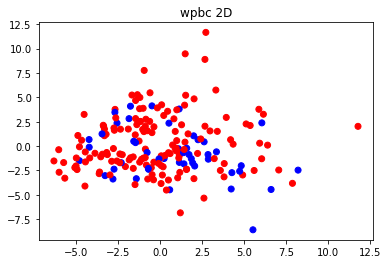

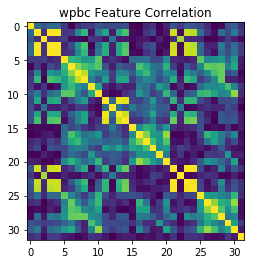

In [28]:
reload(plot)
plot.plot_data(X_wpbc,y_wpbc, 'wpbc')


## Plot Kernels

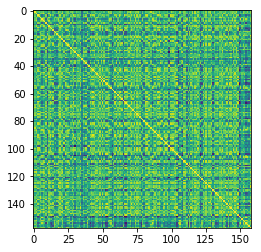

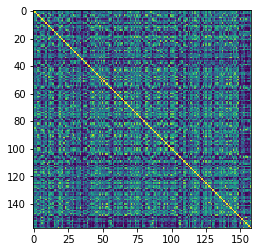

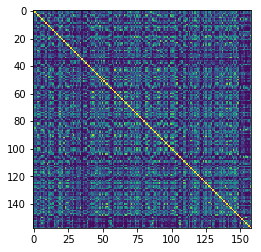

In [33]:
for i in range(3):
    plot.plot_kernel(K[i,...],'wpbc_k%d'%i)

# BEMKL

## Non-sparse

In [3]:
reload(bemkl_binary)

nsp_clf = bemkl_binary.BEMKL(sparse=False)

t1 = time.time()

nsp_clf.bemkl_binary(K,y)

t2 = time.time()
diff = t2 - t1

pred, prob = nsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.825
Training Time: 19.408449173


## Kernel-Sparse

In [30]:
sp_clf = bemkl_binary.BEMKL(sparse=True)

t1 = time.time()

sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.85
Training Time: 18.9799320698


In [31]:
sp_clf.report_results()

Nmber of Chosen Kernels:
17
Nmber of Chosen Points:
157


## data-sparse

In [4]:
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)

t1 = time.time()

dsp_clf.bemkl_binary(K,y)

t2 = time.time()
diff = t2 - t1

pred, prob = dsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.875
Training Time: 17.9471569061


In [6]:
dsp_clf.report_results()

Nmber of Chosen Kernels:
263
Nmber of Chosen Points:
5


## data and kernel sparse

In [11]:
all_sp_clf = bemkl_binary.BEMKL(data_sparse=True, sparse=True)

t1 = time.time()

all_sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = all_sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.85
Training Time: 16.4453778267


## Sparsity Plots

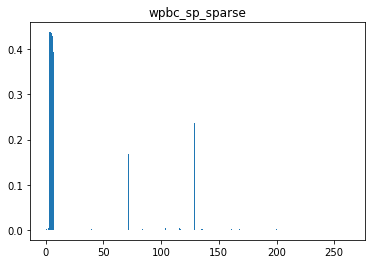

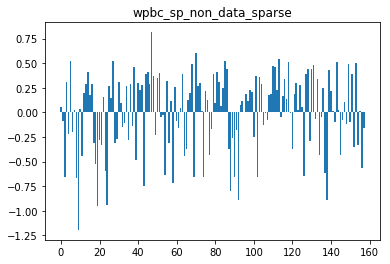

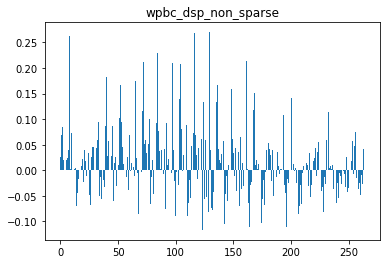

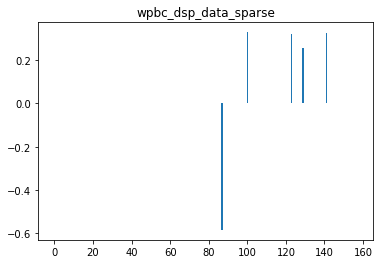

In [32]:
plot.plot_results(sp_clf, 'wpbc_sp')
plot.plot_results(dsp_clf, 'wpbc_dsp')


## Cross Validation

In [37]:
print 'Cross Validation Results for Non-Sparse model:'
nsp_clf = bemkl_binary.BEMKL(sparse=False)
nsp_clf.evaluate_model(K_wpbc,y_wpbc)

print 'Cross Validation Results for Kernel-Sparse model:'
sp_clf = bemkl_binary.BEMKL(sparse=True)
sp_clf.evaluate_model(K_wpbc,y_wpbc)

print 'Cross Validation Results for Data-Sparse model:'
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)
dsp_clf.evaluate_model(K_wpbc,y_wpbc)

Cross Validation Results for Non-Sparse model:
Mean Accuracy: 0.7576923076923077
Cross Validation Results for Kernel-Sparse model:
Mean Accuracy: 0.7628205128205129
Cross Validation Results for Data-Sparse model:
Mean Accuracy: 0.7834615384615384


## Comparison with SVM

In [9]:
from sklearn import svm

# combined kernel using the non-sparse model weights
combined_K = np.sum([K_wpbc[i]*nsp_clf.mu_b_e[i+1] for i in range(K_wpbc.shape[0])], axis=0)
K_com, K_com_test = combined_K[:N,:N],combined_K[N:,:N]

clf = svm.SVC(kernel='precomputed')
clf.fit(K_com, y)

pred = clf.predict(K_com_test)

print 'Accuracy of SVM using combined kernel 1:'
print (pred==y_test).sum()*1./y_test.shape[0]

print 'Number of Support Vectors:'
print clf.support_.shape[0]


Accuracy of SVM using combined kernel 1:
0.85
Number of Support Vectors:
121


### Chosen support vectors (non-sparse combined kernel)

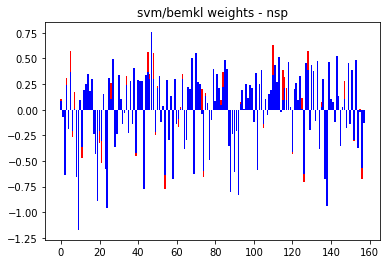

In [26]:
sv_coefs = np.zeros(K.shape[1])
sv_coefs[clf.support_] = clf.dual_coef_

fig= plt.figure()
plt.bar(np.arange(nsp_clf.mu_a.shape[0]), sv_coefs, color='r')
plt.bar(np.arange(nsp_clf.mu_a.shape[0]), nsp_clf.mu_a, color='b', width=.8)

plt.title('svm/bemkl weights - nsp')

fig.savefig('wpbc_svm_nsp.png' , dpi=400,
            transparent=True, bbox_inches='tight')



In [52]:
# combined kernel using the data-sparse model weights
combined_K = np.sum([K_wpbc[i]*dsp_clf.mu_b_e[i+1] for i in range(K_wpbc.shape[0])], axis=0)
K_com, K_com_test = combined_K[:N,:N],combined_K[N:,:N]

clf2 = svm.SVC(kernel='precomputed', probability=True)
clf2.fit(K_com, y)

pred2 = clf2.predict(K_com_test)

print 'Accuracy of SVM using combined kernel 2:'
print (pred2==y_test).sum()*1./y_test.shape[0]

print 'Number of Support Vectors:'
print clf2.support_.shape[0]



Accuracy of SVM using combined kernel 2:
0.725
Number of Support Vectors:
59


### Chosen support vectors (data-sparse combined kernel)

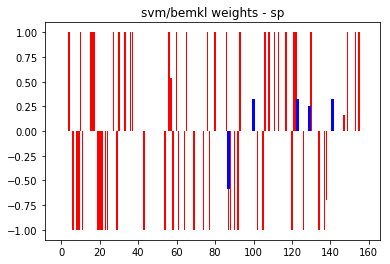

In [59]:
sv_coefs = np.zeros(K.shape[1])
sv_coefs[clf2.support_] = clf2.dual_coef_[0]

fig= plt.figure()
plt.bar(np.arange(dsp_clf.mu_a.shape[0]), sv_coefs, color='r')
plt.bar(np.arange(dsp_clf.mu_a.shape[0]), dsp_clf.mu_a, color='b', width=1.5)

plt.title('svm/bemkl weights - sp')

fig.savefig('wpbc_svm.png' , dpi=400,
            transparent=True, bbox_inches='tight')



### Probability plots

In [17]:
msk_dsp = dsp_clf.mu_a > 1e-3
msk_svm = sv_coefs > 1e-3

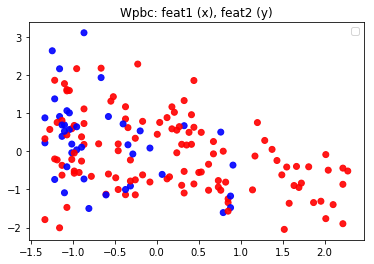

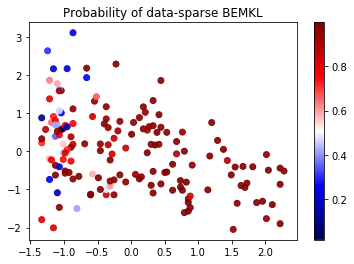

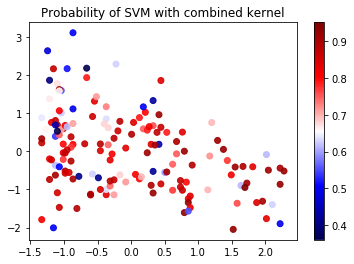

In [81]:
msk = y == 1
c = np.repeat('b', y.shape[0])
c[msk] = 'r'
#c[msk_dsp] = 'k'
#c[msk_svm] = 'g'

Xred = X_wpbc[:N, 0:2]
pred_dsp, prob_dsp = dsp_clf.predict(K)
#y_pred = clf2.predict(K_com)
svm_prob = clf2.predict_proba(K_com)

fig, ax = plt.subplots(1, 1)
plt.scatter(Xred[:, 0], Xred[:, 1], c=c, alpha=.9)
plt.title('Wpbc: feat1 (x), feat2 (y)')
plt.legend()
fig.savefig('wpbc_f1f2.png' , dpi=400,
            transparent=True, bbox_inches='tight')

fig, ax = plt.subplots(1, 1)
plt.scatter(Xred[:, 0], Xred[:N, 1], c=prob_dsp, cmap=plt.cm.seismic, alpha=.9)
plt.title('Probability of data-sparse BEMKL')
plt.colorbar()
fig.savefig('wpbc_dsp_prob.png' , dpi=400,
            transparent=True, bbox_inches='tight')

fig, ax = plt.subplots(1, 1)
plt.scatter(Xred[:, 0], Xred[:N, 1], c=svm_prob[:,1], cmap=plt.cm.seismic, alpha=.9)
plt.title('Probability of SVM with combined kernel')
plt.colorbar()
fig.savefig('wpbc_svm_prob.png' , dpi=400,
            transparent=True, bbox_inches='tight')
